Copied mostly from scripts/extract_pin_addr/test_02-single-bit-change.ipynb

In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../extract_pin_addr")
from JicBitstream import JicBitstream, JicBitstreamZip

%matplotlib notebook

In [2]:
def compare(lst, fn0, fn1, path="../../results/pcie/", verbose=False):
    if verbose:
        print(f"comparing {os.path.basename(fn0)} and {os.path.basename(fn1)}")
    fn0 = os.path.join(path, fn0)
    fn1 = os.path.join(path, fn1)
    jic0 = JicBitstreamZip(fn0)
    jic1 = JicBitstreamZip(fn1)
    diff = jic0.diff_pos(jic1)
    if verbose:
        print(diff)
    lst.append(diff)

In [3]:
diff_lst = []

compare(diff_lst, 
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip", 
        "pcie_vidiccsdisvib0tb0smb2tb2sm-1_0_0_0_0_2_10_0_0.zip")

compare(diff_lst, 
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip", 
        "pcie_vidiccsdisvib0tb0smb2tb2sm-2_0_0_0_0_2_10_0_0.zip")

compare(diff_lst, 
        "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip", 
        "pcie_vidiccsdisvib0tb0smb2tb2sm-65534_0_0_0_0_2_10_0_0.zip")

In [4]:
diff_lst_comb = list()

# trim the begining (header) and the end (checksums)
LIM_LOW = 10000
MAX = np.max(
    [(lambda el: 0 if len(el) == 0 else np.max(el))(el[0]) for el in diff_lst]
)
LIM_HIGH = MAX - 10000

for diff in diff_lst:
    for el in diff[0]:
        if LIM_LOW < el < LIM_HIGH:
            diff_lst_comb.append(el)

diff_lst_comb = np.array(sorted(list(set(diff_lst_comb))))

In [5]:
feat_addrs = diff_lst_comb

feat_addrs1 = feat_addrs[feat_addrs < np.mean(feat_addrs)]
feat_addrs2 = feat_addrs[feat_addrs >= np.mean(feat_addrs)]

In [6]:
jic_path = "../../results/pcie/"

jics = [
    "pcie_vidiccsdisvib0tb0smb2tb2sm-0_0_0_0_0_2_10_0_0.zip",
    "pcie_vidiccsdisvib0tb0smb2tb2sm-1_0_0_0_0_2_10_0_0.zip",
    "pcie_vidiccsdisvib0tb0smb2tb2sm-2_0_0_0_0_2_10_0_0.zip",
    "pcie_vidiccsdisvib0tb0smb2tb2sm-65534_0_0_0_0_2_10_0_0.zip",
]

for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat = j.get_els(feat_addrs).astype(int)
    print(feat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0]


<IPython.core.display.Javascript object>


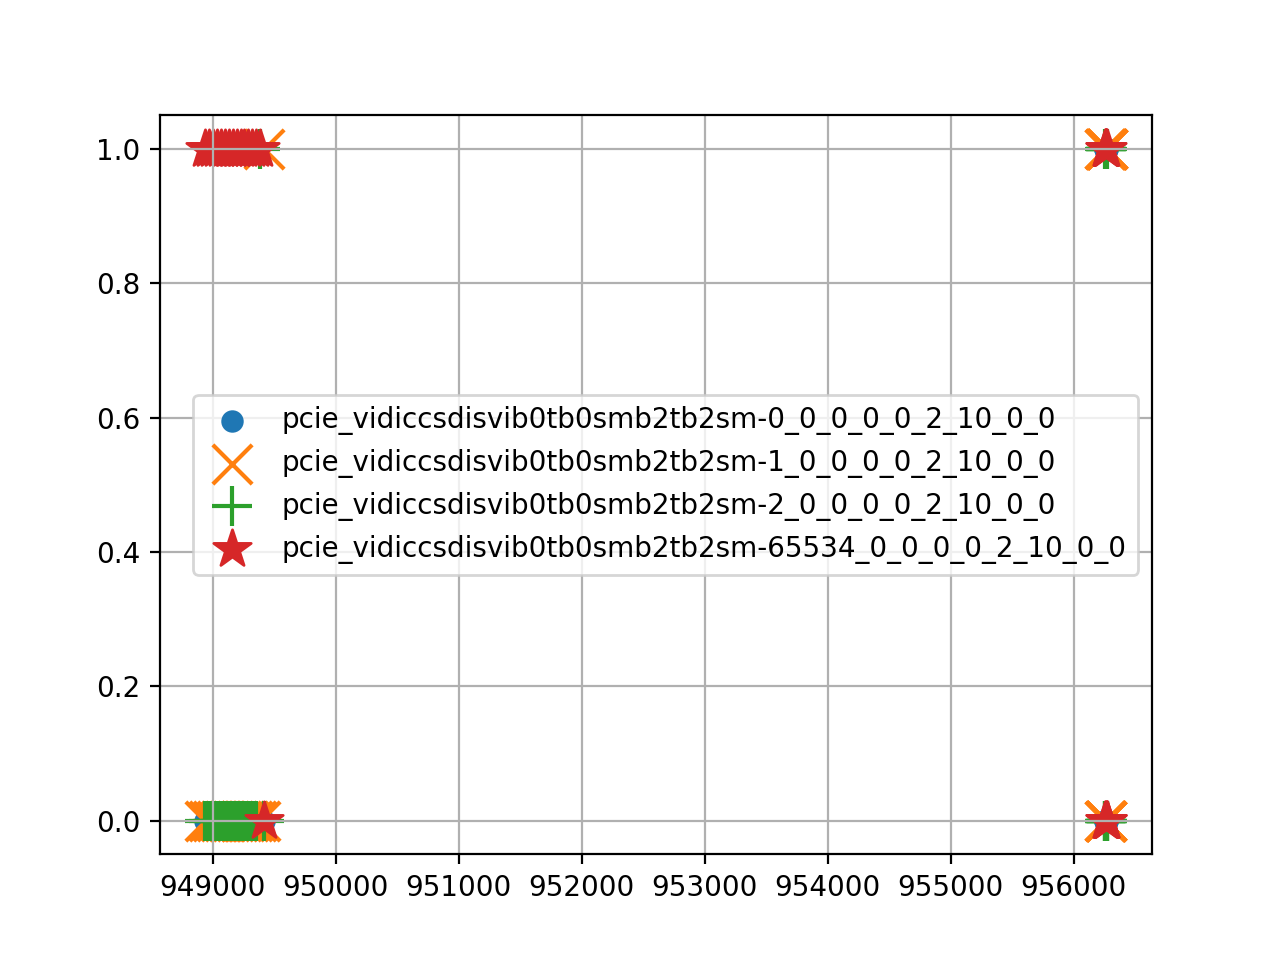

<IPython.core.display.Javascript object>


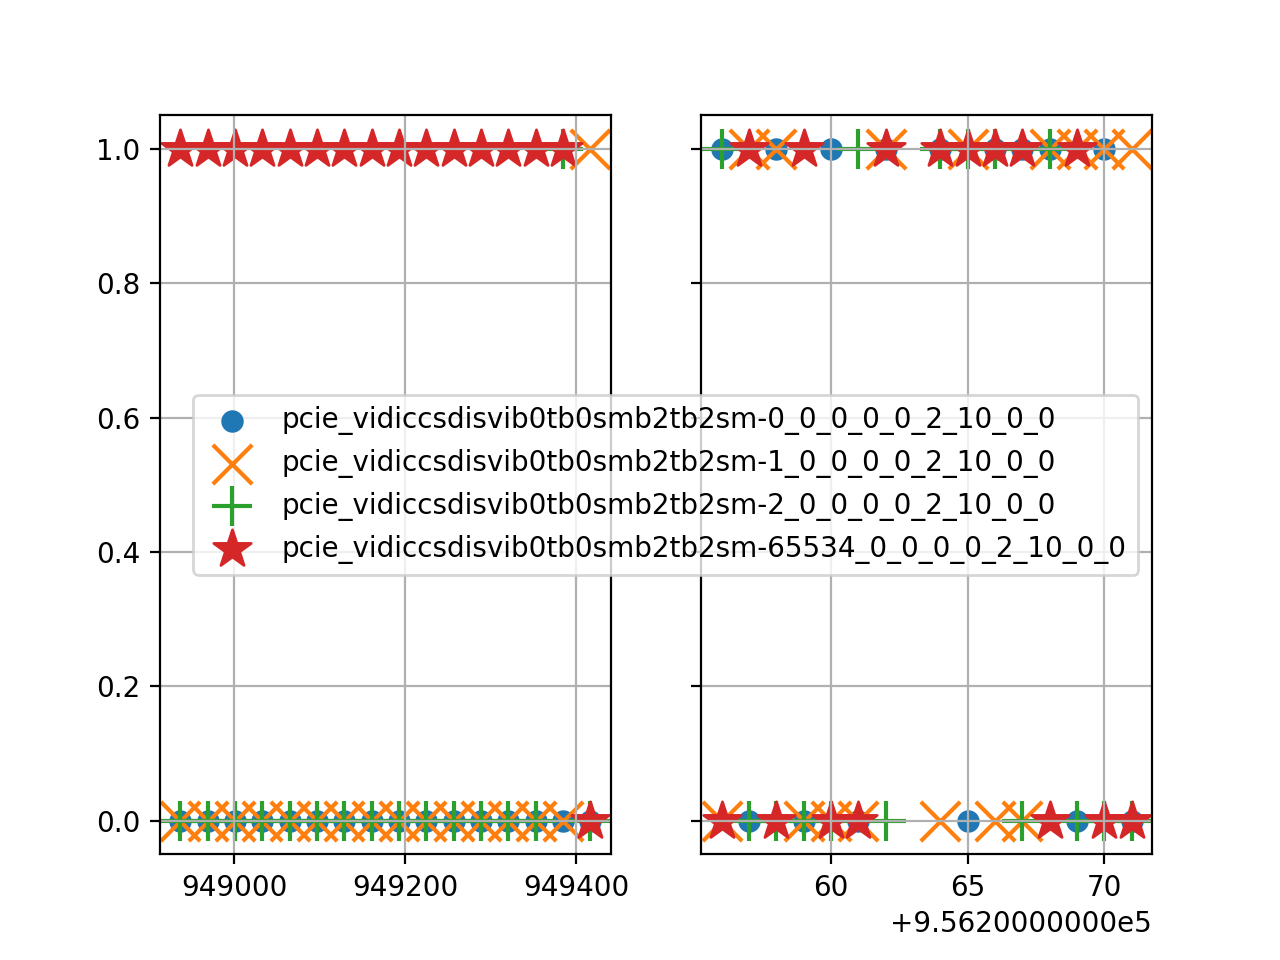

In [7]:
def MARKERS():
    ms = [".", "x", "+", "*", "1", "2"]
    idx = 0

    while True:
        yield ms[idx]
        idx += 1
        if idx >= len(ms):
            idx = 0

fig, ax = plt.subplots()
markers = MARKERS()

for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat = j.get_els(feat_addrs).astype(int)
    marker = next(markers)
    label = jic.replace(".zip", "")
    ax.scatter(feat_addrs, feat, marker=marker, s=200, label=label)
    #ax.plot([np.mean(feat_addrs), np.mean(feat_addrs)], [-0.1, 1.1], '--')
    ax.legend()
    ax.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
markers = MARKERS()

for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat1 = j.get_els(feat_addrs1).astype(int)
    feat2 = j.get_els(feat_addrs2).astype(int)
    marker = next(markers)
    label = jic.replace(".zip", "")
    ax1.scatter(feat_addrs1, feat1, marker=marker, s=200)
    ax2.scatter(feat_addrs2, feat2, marker=marker, s=200, label=label)
    ax2.legend()
    ax1.grid(True)
    ax2.grid(True)